In [1]:
import json
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import matplotlib.patches as patches
import ast
from collections import Counter
import numpy as np
import scipy
from scipy.ndimage.filters import gaussian_filter
import sys
sys.path.insert(0,'util/')
import spotlight as sp
import shared_functions as sf
import pickle
import warnings
warnings.filterwarnings('ignore')

imdir = '../data/CodeCharts/CAT2000_images/' # CHANGE THIS 
# by downloading the images from here: http://attent-methods.scripts.mit.edu/datasets/CAT2000_images.zip

In [ ]:
with open('CodeCharts_CAT2000.pickle', 'rb') as curfile:  
    CC_data = pickle.load(curfile)

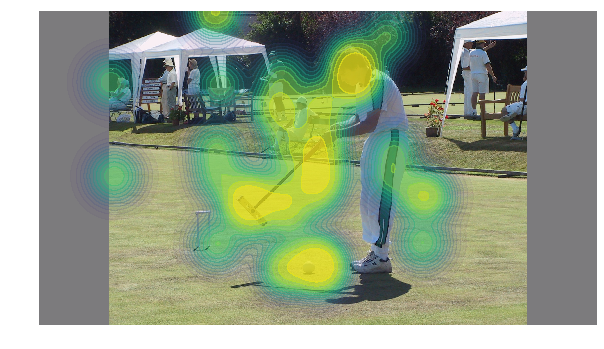

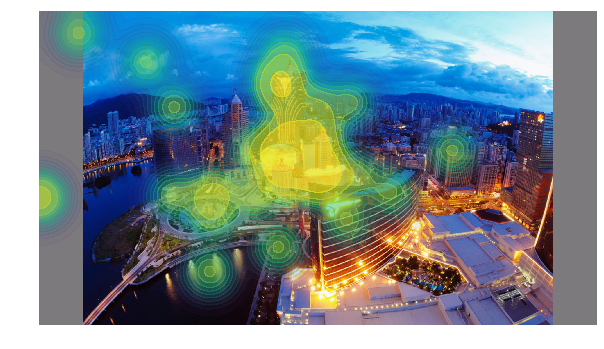

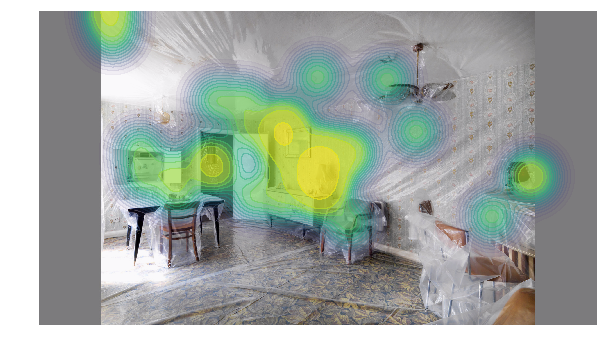

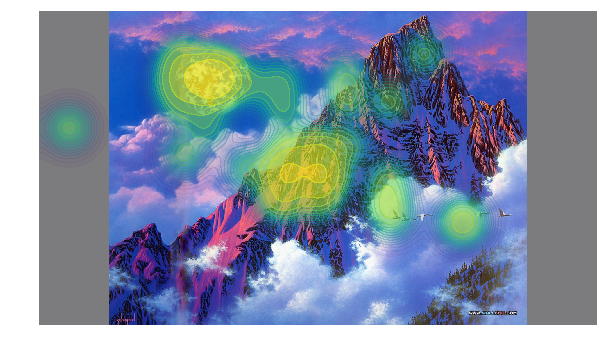

In [ ]:
# plottype:
# 1 for gaze locations only
# 2 for heatmap overlay
# 3 for regular spotlight
# 4 for spotlight with level sets
plottype = 2

SIGMA = 50 # used for converting locations into maps (distributions)

imnames = list(CC_data.keys())
imnames = imnames[:5] # UNCOMMENT this to plot heatmaps on all images

for filename in imnames:

    code_heatmap,im = sf.get_heatmap_for_image(filename,CC_data[filename],imdir,sigma=SIGMA,toplot=False)
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    
    if plottype==1:
        ax.imshow(im)
        xs = [elem['coords'][0] for elem in CC_data[imnames[i]]]
        ys = [elem['coords'][1] for elem in CC_data[imnames[i]]]
        ax.scatter(x=xs, y=ys, c='r', s=10)
    elif plottype==2:
        sp.transparent_heatmap(ax,im,code_heatmap)
    elif plottype==3:
        spotlight_res = sp.spotlight(im,code_heatmap,toplot=False);
        ax.imshow(spotlight_res); 
    elif plottype==4:
        spotlight_res = sp.spotlight_custom(im,code_heatmap,toplot=False,percentile_based=False,levels=5,most_salient_nlevel=3,smoothness=0)
        ax.imshow(spotlight_res); 

    ax.set_axis_off(); #ax.set_title('Codecharts with fixations overlaid (NSS=%2.2f)'%(NSS_fix_on_code[i]));

    plt.show();